- Competition: https://www.kaggle.com/competitions/aerial-cactus-identification/overview
- Dataset: https://www.kaggle.com/competitions/aerial-cactus-identification/data
- Code: https://www.kaggle.com/code/shahules/getting-started-with-cnn-and-vgg16
- Deep Learning: https://www.kaggle.com/learn/intro-to-deep-learning

# 1- Introduction

- How to prepare your data to feed to a neural network
- How convolution neural network works
- How to implement cnn in keras
- How to evaluate your results
- How to use keras pretrained network to improve your model
- How to predit and create a submission

## 1-1 Loading required libraries

In [1]:
import pandas as pd
import os, cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers, models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
print(os.listdir('/Users/kenny_jung/aiffel/data/aerial_cactus/'))

import numpy as np

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


['.DS_Store', 'test', 'train', 'train.csv', 'sample_submission.csv']


## 1-2 Setting dataset directories

In [2]:
train_dir = '/Users/kenny_jung/aiffel/data/aerial_cactus/train'
test_dir = '/Users/kenny_jung/aiffel/data/aerial_cactus/test'
train = pd.read_csv('/Users/kenny_jung/aiffel/data/aerial_cactus/train.csv')
df_test = pd.read_csv('/Users/kenny_jung/aiffel/data/aerial_cactus/sample_submission.csv')

In [17]:
train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [15]:
df_test.head(10)


,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5
5,0038ed6f7417b8275b393307f66cb1e3.jpg,0.5
6,0059dfa41de4441fc23b9a4b98ba99cb.jpg,0.5
7,0061bd302d735db829418cb90b4e6040.jpg,0.5
8,00754573d8c7223e73da553dd43780bd.jpg,0.5
9,008d9fce71c8e03a4c9cdd15ea908573.jpg,0.5


<Axes: xlabel='has_cactus', ylabel='Count'>

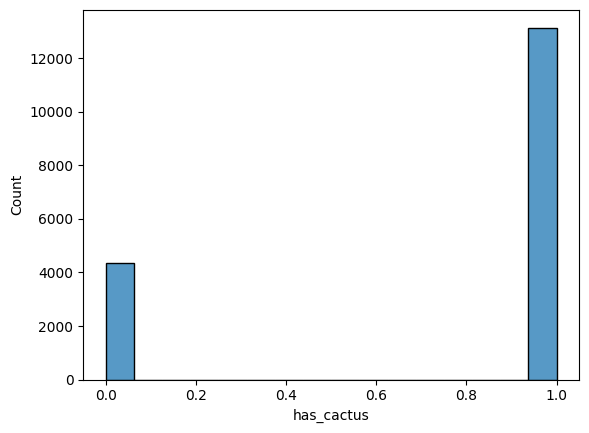

In [14]:
sns.histplot(train['has_cactus'])

## 1-3 Getting a basic idea

In [18]:
train.head(5)
train.has_cactus = train.has_cactus.astype(str)

In [19]:
print('out dataset has {} rows and {} columns'.format(train.shape[0], train.shape[1]))

out dataset has 17500 rows and 2 columns


In [20]:
train['has_cactus'].value_counts()

has_cactus
1    13136
0     4364
Name: count, dtype: int64

In [24]:
print('The number  of rows in test set is %d'%(len(os.listdir(test_dir))))

The number  of rows in test set is 4000


## 1-4 Displaying image

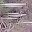

In [22]:
Image(os.path.join(train_dir,train.iloc[0,0]),width=250,height=250)

## 1-5 Data preparation

In [27]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 150

In [28]:
train_generator = datagen.flow_from_dataframe(
    dataframe = train[:15001], 
    directory = train_dir, 
    x_col = 'id',
    y_col = 'has_cactus',
    class_mode = 'binary',
    batch_size = batch_size,
    target_size = (150, 150)
)

validation_generator = datagen.flow_from_dataframe(
    dataframe = train[15000:],
    directory = train_dir,
    x_col = 'id',
    y_col = 'has_cactus',
    class_mode = 'binary',
    batch_size = 50,
    target_size = (150, 150)
)

Found 15001 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


## 1-6 Building our model

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32,
                        (3, 3), 
                        activation = 'relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,
                        (3, 3),
                        activation = 'relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,
                        (3, 3),
                        activation = 'relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,
                        (3, 3),
                        activation = 'relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


## 1-7 Displaying summary of our network

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

## Compiling our model

In [39]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(),
             metrics = ['acc'])

## Fitting our model

In [42]:
epochs = 10
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 10,
                              validation_data = validation_generator,
                              validation_steps = 50
)

Epoch 1/10


/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_4912/1251734385.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 78s 774ms/step - loss: 0.4619 - acc: 0.7882 - val_loss: 0.2436 - val_acc: 0.9248
Epoch 2/10
100/100 [==============================] - 77s 768ms/step - loss: 0.2368 - acc: 0.9087 - val_loss: 0.1879 - val_acc: 0.9264
Epoch 3/10
100/100 [==============================] - 77s 766ms/step - loss: 0.1917 - acc: 0.9288 - val_loss: 0.1796 - val_acc: 0.9284
Epoch 4/10
100/100 [==============================] - 76s 757ms/step - loss: 0.1467 - acc: 0.9407 - val_loss: 0.1164 - val_acc: 0.9540
Epoch 5/10
100/100 [==============================] - 86s 865ms/step - loss: 0.1446 - acc: 0.9403 - val_loss: 0.1099 - val_acc: 0.9508
Epoch 6/10
100/100 [==============================] - 77s 766ms/step - loss: 0.1176 - acc: 0.9521 - val_loss: 0.0864 - val_acc: 0.9648
Epoch 7/10
100/100 [==============================] - 76s 757ms/step - loss: 0.0931 - acc: 0.9607 - val_loss: 0.0648 - val_acc: 0.9760
Epoch 8/10
100/100 [==============================] - 77s 770ms/st